# AMAZON REVIEW PROJECT

## the goal of project :

#### Title:  
Sentiment Analysis of Public Opinion on Amazon reviews

#### Description:
This project is focuses on analyzing public Feedback for the amazon products.

## Modules used

### re:
The "re" module in Python provides regular expression operations.

### nltk: 
The Natural Language Toolkit (NLTK) is a Python library for working with human language data

### spacy: 
It offers efficient tokenization, named entity recognition, part-of-speech tagging, and dependency parsing. 

### string: 
The "string" module provides a collection of commonly used string operations and constants. 

### demoji: 
The demoji library is used for dealing with emojis in text data. 

### contractions: 
The contractions library helps in expanding contractions in English text. For example, it can convert "don't" to "do not" and "can't" to "cannot".

### unidecode: 
The unidecode library is used for transliterating Unicode characters to ASCII characters. 

### num2words: 
The num2words library allows you to convert numbers to their textual representation. For example, it can convert the number 42 to "forty-two" or 3.14 to "three point one four".

### stopwords (from nltk.corpus):
Stopwords are commonly used words that often do not contribute much to the meaning of a text. The nltk.corpus.stopwords module provides a list of stopwords in various languages. These stopwords are commonly removed from text data during preprocessing.

### PorterStemmer (from nltk.stem.porter):
PorterStemmer is a stemming algorithm implemented in NLTK. Stemming is the process of reducing words to their base or root form. The PorterStemmer algorithm applies a set of rules to remove common word endings and suffixes.

### SnowballStemmer (from nltk.stem.snowball):
SnowballStemmer is another stemming algorithm provided by NLTK. It is an extension of the PorterStemmer and supports stemming in multiple languages.

### WordNetLemmatizer (from nltk.stem):
Lemmatization is the process of reducing words to their base or dictionary form (lemmas). The WordNetLemmatizer in NLTK uses the WordNet lexical database to perform lemmatization, which ensures that the resulting lemmas are actual words.

### BeautifulSoup (from bs4): 
BeautifulSoup is a Python library used for parsing HTML and XML documents. It provides helpful functions and methods to extract data from HTML/XML structures and handle web scraping tasks.



In [1]:
import numpy as np
import pandas as pd
import string
import demoji
import contractions
import unidecode
import re

In [2]:
from num2words import num2words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import string
import demoji
import contractions
import unidecode

In [3]:
train_data = pd.read_csv("C:/Users/Leelaramudu/OneDrive/Desktop/Amazon/train.csv")
test_data = pd.read_csv("C:/Users/Leelaramudu/OneDrive/Desktop/Amazon/test.csv")

In [4]:
train_data

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...


In [5]:
test_data 

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [15]:
column_names = ['polarity', 'title', 'text'] 
train_data.columns = column_names
test_data.columns = column_names

In [16]:
train_data

,polarity,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...


In [17]:
test_data

,polarity,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [18]:
train_data.shape , test_data.shape

((3599999, 3), (399999, 3))

In [20]:
subset_train_data = train_data.iloc[:5000]
subset_test_data = test_data.iloc[:500]

In [21]:
subset_train_data

,polarity,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
4995,2,"Sheer madness, meticulously documented","Yes, all the reviews are correct: This is an e..."
4996,2,The weirdest plot ever and it's all true.,I remember last year around Halloween I read a...
4997,2,the most exciting book i've ever read. i loved...,I thought this book was magnificent. The way V...
4998,2,This Book Will Scare The Hell Out Of You,Vincent Bugliosi isn't kidding when he writes ...


In [22]:
subset_test_data

,polarity,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
495,1,I'm glad I didn't pay for it.,I received this as a Christmas gift from a fri...
496,2,Great book!,This book gives a great look into the Jewish m...
497,2,Streisand:Live In Concert (2CD's) - Good,This is a good double CD packed with alot of f...
498,1,Come on... You Have Gotta Be Kidding!,"Ok, first of all I was looking for Lighthouse ..."


# Data preprocessing

# NULL VALUES CHECKING

In [23]:
subset_train_data.isna().sum()

polarity    0
title       0
text        0
dtype: int64

In [24]:
subset_test_data.isna().sum()

polarity    0
title       1
text        0
dtype: int64

In [25]:
subset_test_data.dropna(subset = ["title"],inplace=True)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1222661249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data.dropna(subset = ["title"],inplace=True)


In [26]:
subset_test_data.isna().sum()

polarity    0
title       0
text        0
dtype: int64

# LOWERCASING

In [27]:
subset_train_data["lower"] = subset_train_data.text.str.lower()

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\132566011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data["lower"] = subset_train_data.text.str.lower()


In [28]:
subset_train_data

,polarity,title,text,lower
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,i'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,i truly like this soundtrack and i enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...","if you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,i am quite sure any of you actually taking the...
...,...,...,...,...
4995,2,"Sheer madness, meticulously documented","Yes, all the reviews are correct: This is an e...","yes, all the reviews are correct: this is an e..."
4996,2,The weirdest plot ever and it's all true.,I remember last year around Halloween I read a...,i remember last year around halloween i read a...
4997,2,the most exciting book i've ever read. i loved...,I thought this book was magnificent. The way V...,i thought this book was magnificent. the way v...
4998,2,This Book Will Scare The Hell Out Of You,Vincent Bugliosi isn't kidding when he writes ...,vincent bugliosi isn't kidding when he writes ...


In [29]:
subset_test_data["lower"] = subset_test_data.text.str.lower()
subset_test_data

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1592763789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data["lower"] = subset_test_data.text.str.lower()


,polarity,title,text,lower
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,despite the fact that i have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,i bought this charger in jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,check out maha energy's website. their powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...,i also began having the incorrect disc problem...
...,...,...,...,...
495,1,I'm glad I didn't pay for it.,I received this as a Christmas gift from a fri...,i received this as a christmas gift from a fri...
496,2,Great book!,This book gives a great look into the Jewish m...,this book gives a great look into the jewish m...
497,2,Streisand:Live In Concert (2CD's) - Good,This is a good double CD packed with alot of f...,this is a good double cd packed with alot of f...
498,1,Come on... You Have Gotta Be Kidding!,"Ok, first of all I was looking for Lighthouse ...","ok, first of all i was looking for lighthouse ..."


# STOPWORD REMOVING

In [30]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

subset_train_data["lower"] = subset_train_data["lower"].apply(remove_stopwords)
subset_test_data["lower"] = subset_test_data["lower"].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leelaramudu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leelaramudu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\2750612788.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data["lower"] = subset_train_data["lower"].apply(remove_stopwords)
C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\2750612788.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [32]:
subset_train_data


,polarity,title,text,lower
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,'m reading lot reviews saying best 'game sound...
1,2,Amazing!,This soundtrack is my favorite music of all ti...,"soundtrack favorite music time , hands . inten..."
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music ....
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...","'ve played game , know divine music ! every si..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,quite sure actually taking time read played ga...
...,...,...,...,...
4995,2,"Sheer madness, meticulously documented","Yes, all the reviews are correct: This is an e...","yes , reviews correct : excellent writer detai..."
4996,2,The weirdest plot ever and it's all true.,I remember last year around Halloween I read a...,remember last year around halloween read artic...
4997,2,the most exciting book i've ever read. i loved...,I thought this book was magnificent. The way V...,thought book magnificent . way vincent buglios...
4998,2,This Book Will Scare The Hell Out Of You,Vincent Bugliosi isn't kidding when he writes ...,vincent bugliosi n't kidding writes first page...


# Punctuations

In [33]:
PUNCTUATIONS = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCTUATIONS))

In [34]:
subset_train_data.lower = subset_train_data["lower"].apply(lambda punctuation: remove_punctuation(punctuation))

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\905958529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data.lower = subset_train_data["lower"].apply(lambda punctuation: remove_punctuation(punctuation))


In [35]:
subset_test_data.lower = subset_test_data["lower"].apply(lambda punctuation: remove_punctuation(punctuation))

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1716365520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data.lower = subset_test_data["lower"].apply(lambda punctuation: remove_punctuation(punctuation))


# URL and Mention Removal

In [36]:

def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+', '', text)

subset_train_data['lower'] = subset_train_data['lower'].apply(remove_urls)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\492343990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['lower'] = subset_train_data['lower'].apply(remove_urls)


In [37]:
subset_train_data

,polarity,title,text,lower
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,m reading lot reviews saying best game soundtr...
1,2,Amazing!,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music ...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",ve played game know divine music every singl...
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,quite sure actually taking time read played ga...
...,...,...,...,...
4995,2,"Sheer madness, meticulously documented","Yes, all the reviews are correct: This is an e...",yes reviews correct excellent writer detaili...
4996,2,The weirdest plot ever and it's all true.,I remember last year around Halloween I read a...,remember last year around halloween read artic...
4997,2,the most exciting book i've ever read. i loved...,I thought this book was magnificent. The way V...,thought book magnificent way vincent bugliosi...
4998,2,This Book Will Scare The Hell Out Of You,Vincent Bugliosi isn't kidding when he writes ...,vincent bugliosi nt kidding writes first page ...


In [38]:
subset_test_data['lower'] = subset_test_data['lower'].apply(remove_urls)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\2602543302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['lower'] = subset_test_data['lower'].apply(remove_urls)


# Hashtag Handling

In [39]:

def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

subset_train_data['lower'] =subset_train_data['lower'].apply(remove_hashtags)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\894619919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['lower'] =subset_train_data['lower'].apply(remove_hashtags)


In [40]:
subset_test_data['lower'] =subset_test_data['lower'].apply(remove_hashtags)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1721666537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['lower'] =subset_test_data['lower'].apply(remove_hashtags)


# Emoticon Handling

In [41]:
def remove_emoticons(text):
    emoticon_pattern = r"[:;=]-?[)(|DPOo0/\\]+"
    text = re.sub(emoticon_pattern, "", text)
    return text

In [42]:
subset_train_data['lower'] =subset_train_data['lower'].apply(remove_emoticons)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\3292462551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['lower'] =subset_train_data['lower'].apply(remove_emoticons)


In [43]:
subset_train_data

,polarity,title,text,lower
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,m reading lot reviews saying best game soundtr...
1,2,Amazing!,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music ...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",ve played game know divine music every singl...
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,quite sure actually taking time read played ga...
...,...,...,...,...
4995,2,"Sheer madness, meticulously documented","Yes, all the reviews are correct: This is an e...",yes reviews correct excellent writer detaili...
4996,2,The weirdest plot ever and it's all true.,I remember last year around Halloween I read a...,remember last year around halloween read artic...
4997,2,the most exciting book i've ever read. i loved...,I thought this book was magnificent. The way V...,thought book magnificent way vincent bugliosi...
4998,2,This Book Will Scare The Hell Out Of You,Vincent Bugliosi isn't kidding when he writes ...,vincent bugliosi nt kidding writes first page ...


In [44]:
subset_test_data['lower'] =subset_test_data['lower'].apply(remove_emoticons)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1392600967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['lower'] =subset_test_data['lower'].apply(remove_emoticons)


# Spelling Correction

In [45]:
from spellchecker import 
SpellChecker
def correct_spelling(text):
    spell = SpellChecker()
    words = text.split()
    corrected_words = []
    for word in words:
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
    corrected_text = ' '.join(corrected_words)
    return corrected_text

In [47]:
subset_train_data["spelling_cor"] =subset_train_data["lower"].apply(lambda lower:  correct_spelling(lower))

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\263296458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data["spelling_cor"] =subset_train_data["lower"].apply(lambda lower:  correct_spelling(lower))


In [51]:
subset_train_data.head()

,polarity,title,text,lower,spelling_cor
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,m reading lot reviews saying best game soundtr...,i reading lot reviews saying best game soundtr...
1,2,Amazing!,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense...,soundtrack favorite music time hands intense s...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music ...,truly like soundtrack enjoy video game music p...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",ve played game know divine music every singl...,ve played game know divine music every single ...
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,quite sure actually taking time read played ga...,quite sure actually taking time read played ga...


In [79]:
subset_test_data["spelling_cor"] =subset_test_data["lower"].apply(lambda lower:  correct_spelling(lower))

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\764897000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data["spelling_cor"] =subset_test_data["lower"].apply(lambda lower:  correct_spelling(lower))


# Lemmatization

In [53]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word, wordnet.VERB) for word in tokens]  
    return ' '.join(lemmatized_tokens)
subset_train_data["lemmatized_text"] = subset_train_data["spelling_cor"].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leelaramudu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1788638750.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data["lemmatized_text"] = subset_train_data["spelling_cor"].apply(lemmatize_text)


In [57]:
subset_train_data.lower[0]

'm reading lot reviews saying best game soundtrack  figured d write review disagree bit  opinino yasunori mitsuda s ultimate masterpiece  music timeless m listening years beauty simply refuses fadethe price tag pretty staggering must say  going buy cd much money  one feel would worth every penny '

In [58]:
subset_train_data.lemmatized_text[0]

'i read lot review say best game soundtrack figure i write review disagree bite opinion itsuka i ultimate masterpiece music timeless i listen years beauty simply refuse havethe price tag pretty stagger must say go buy ad much money one feel would worth every penny'

In [80]:
subset_test_data["lemmatized_text"] = subset_test_data["spelling_cor"].apply(lemmatize_text)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\985858907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data["lemmatized_text"] = subset_test_data["spelling_cor"].apply(lemmatize_text)


# Removing Extra Whitespace

In [59]:
def remove_extra_whitespace(text):
    return ' '.join(text.split())

subset_train_data['cleaned_text'] = subset_train_data["lemmatized_text"].apply(remove_extra_whitespace)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\2600322378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['cleaned_text'] = subset_train_data["lemmatized_text"].apply(remove_extra_whitespace)


In [81]:
subset_test_data['cleaned_text'] = subset_test_data["lemmatized_text"].apply(remove_extra_whitespace)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1625494440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['cleaned_text'] = subset_test_data["lemmatized_text"].apply(remove_extra_whitespace)


# Removing Numeric Digits


In [62]:

def remove_numeric_digits(text):
    return ''.join([char for char in text if not char.isdigit()])

subset_train_data['cleaned_text'] = subset_train_data['cleaned_text'].apply(remove_numeric_digits)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\355510582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['cleaned_text'] = subset_train_data['cleaned_text'].apply(remove_numeric_digits)


In [65]:
subset_train_data

,polarity,title,text,lower,spelling_cor,lemmatized_text,cleaned_text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,m reading lot reviews saying best game soundtr...,i reading lot reviews saying best game soundtr...,i read lot review say best game soundtrack fig...,i read lot review say best game soundtrack fig...
1,2,Amazing!,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense...,soundtrack favorite music time hands intense s...,soundtrack favorite music time hand intense sa...,soundtrack favorite music time hand intense sa...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music ...,truly like soundtrack enjoy video game music p...,truly like soundtrack enjoy video game music p...,truly like soundtrack enjoy video game music p...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",ve played game know divine music every singl...,ve played game know divine music every single ...,ve play game know divine music every single so...,ve play game know divine music every single so...
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,quite sure actually taking time read played ga...,quite sure actually taking time read played ga...,quite sure actually take time read play game l...,quite sure actually take time read play game l...
...,...,...,...,...,...,...,...
4995,2,"Sheer madness, meticulously documented","Yes, all the reviews are correct: This is an e...",yes reviews correct excellent writer detaili...,yes reviews correct excellent writer detailing...,yes review correct excellent writer detail gru...,yes review correct excellent writer detail gru...
4996,2,The weirdest plot ever and it's all true.,I remember last year around Halloween I read a...,remember last year around halloween read artic...,remember last year around halloween read artic...,remember last year around halloween read artic...,remember last year around halloween read artic...
4997,2,the most exciting book i've ever read. i loved...,I thought this book was magnificent. The way V...,thought book magnificent way vincent bugliosi...,thought book magnificent way vincent described...,think book magnificent way vincent describe ev...,think book magnificent way vincent describe ev...
4998,2,This Book Will Scare The Hell Out Of You,Vincent Bugliosi isn't kidding when he writes ...,vincent bugliosi nt kidding writes first page ...,vincent it kidding writes first page story rea...,vincent it kid write first page story read sca...,vincent it kid write first page story read sca...


In [82]:
subset_test_data['cleaned_text'] = subset_test_data['cleaned_text'].apply(remove_numeric_digits)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\4215721781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['cleaned_text'] = subset_test_data['cleaned_text'].apply(remove_numeric_digits)


# Removing HTML Tag

In [66]:

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

subset_train_data['cleaned_text'] = subset_train_data['cleaned_text'].apply(remove_html_tags)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\2129894629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['cleaned_text'] = subset_train_data['cleaned_text'].apply(remove_html_tags)


In [83]:
subset_test_data['cleaned_text'] = subset_test_data['cleaned_text'].apply(remove_html_tags)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\2348504989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['cleaned_text'] = subset_test_data['cleaned_text'].apply(remove_html_tags)


# Removing Retweets

In [67]:

def remove_retweets(text):
    return text.replace('RT @', '')

subset_train_data['cleaned_text'] = subset_train_data['cleaned_text'].apply(remove_retweets)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\3768514584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['cleaned_text'] = subset_train_data['cleaned_text'].apply(remove_retweets)


In [84]:
subset_test_data['cleaned_text'] = subset_test_data['cleaned_text'].apply(remove_retweets)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\40643327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['cleaned_text'] = subset_test_data['cleaned_text'].apply(remove_retweets)


# Tokenization

In [68]:

from nltk.tokenize import word_tokenize

nltk.download('punkt')
def tokenize_text(text):
    return word_tokenize(text)

subset_train_data['tokenized_text'] = subset_train_data['cleaned_text'].apply(tokenize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leelaramudu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\111492480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['tokenized_text'] = subset_train_data['cleaned_text'].apply(tokenize_text)


In [69]:
subset_train_data

,polarity,title,text,lower,spelling_cor,lemmatized_text,cleaned_text,tokenized_text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,m reading lot reviews saying best game soundtr...,i reading lot reviews saying best game soundtr...,i read lot review say best game soundtrack fig...,i read lot review say best game soundtrack fig...,"[i, read, lot, review, say, best, game, soundt..."
1,2,Amazing!,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense...,soundtrack favorite music time hands intense s...,soundtrack favorite music time hand intense sa...,soundtrack favorite music time hand intense sa...,"[soundtrack, favorite, music, time, hand, inte..."
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music ...,truly like soundtrack enjoy video game music p...,truly like soundtrack enjoy video game music p...,truly like soundtrack enjoy video game music p...,"[truly, like, soundtrack, enjoy, video, game, ..."
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",ve played game know divine music every singl...,ve played game know divine music every single ...,ve play game know divine music every single so...,ve play game know divine music every single so...,"[ve, play, game, know, divine, music, every, s..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,quite sure actually taking time read played ga...,quite sure actually taking time read played ga...,quite sure actually take time read play game l...,quite sure actually take time read play game l...,"[quite, sure, actually, take, time, read, play..."
...,...,...,...,...,...,...,...,...
4995,2,"Sheer madness, meticulously documented","Yes, all the reviews are correct: This is an e...",yes reviews correct excellent writer detaili...,yes reviews correct excellent writer detailing...,yes review correct excellent writer detail gru...,yes review correct excellent writer detail gru...,"[yes, review, correct, excellent, writer, deta..."
4996,2,The weirdest plot ever and it's all true.,I remember last year around Halloween I read a...,remember last year around halloween read artic...,remember last year around halloween read artic...,remember last year around halloween read artic...,remember last year around halloween read artic...,"[remember, last, year, around, halloween, read..."
4997,2,the most exciting book i've ever read. i loved...,I thought this book was magnificent. The way V...,thought book magnificent way vincent bugliosi...,thought book magnificent way vincent described...,think book magnificent way vincent describe ev...,think book magnificent way vincent describe ev...,"[think, book, magnificent, way, vincent, descr..."
4998,2,This Book Will Scare The Hell Out Of You,Vincent Bugliosi isn't kidding when he writes ...,vincent bugliosi nt kidding writes first page ...,vincent it kidding writes first page story rea...,vincent it kid write first page story read sca...,vincent it kid write first page story read sca...,"[vincent, it, kid, write, first, page, story, ..."


In [85]:
subset_test_data['tokenized_text'] = subset_test_data['cleaned_text'].apply(tokenize_text)

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1456382965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['tokenized_text'] = subset_test_data['cleaned_text'].apply(tokenize_text)


In [86]:
subset_test_data

,polarity,title,text,lower,spelling_cor,lemmatized_text,cleaned_text,tokenized_text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,despite fact played small portion game music ...,despite fact played small portion game music h...,despite fact play small portion game music hea...,despite fact play small portion game music hea...,"[despite, fact, play, small, portion, game, mu..."
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,bought charger jul 2003 worked ok design nice...,bought charger jug 2003 worked ok design nice ...,buy charger jug 2003 work ok design nice conve...,buy charger jug work ok design nice convenien...,"[buy, charger, jug, work, ok, design, nice, co..."
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,check maha energy s website powerex mhc204f c...,check mama energy i website powered charger wo...,check mama energy i website power charger work...,check mama energy i website power charger work...,"[check, mama, energy, i, website, power, charg..."
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,reviewed quite bit combo players hesitant due ...,reviewed quite bit combo players hesitant due ...,review quite bite combo players hesitant due u...,review quite bite combo players hesitant due u...,"[review, quite, bite, combo, players, hesitant..."
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...,also began incorrect disc problems ve read vc...,also began incorrect disc problems ve read ver...,also begin incorrect disc problems ve read ver...,also begin incorrect disc problems ve read ver...,"[also, begin, incorrect, disc, problems, ve, r..."
...,...,...,...,...,...,...,...,...
495,1,I'm glad I didn't pay for it.,I received this as a Christmas gift from a fri...,received christmas gift friend knows like hot ...,received christmas gift friend knows like hot ...,receive christmas gift friend know like hot te...,receive christmas gift friend know like hot te...,"[receive, christmas, gift, friend, know, like,..."
496,2,Great book!,This book gives a great look into the Jewish m...,book gives great look jewish mindset early 190...,book gives great look jewish mindset early mus...,book give great look jewish mindset early must...,book give great look jewish mindset early must...,"[book, give, great, look, jewish, mindset, ear..."
497,2,Streisand:Live In Concert (2CD's) - Good,This is a good double CD packed with alot of f...,good double cd packed alot favorites liked sl...,good double ad packed lot favorites liked slot...,good double ad pack lot favorites like slot di...,good double ad pack lot favorites like slot di...,"[good, double, ad, pack, lot, favorites, like,..."
498,1,Come on... You Have Gotta Be Kidding!,"Ok, first of all I was looking for Lighthouse ...",ok first looking lighthouse classic poprock g...,ok first looking lighthouse classic pollock gr...,ok first look lighthouse classic pollock group...,ok first look lighthouse classic pollock group...,"[ok, first, look, lighthouse, classic, pollock..."


# Word Cloud

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\435044071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train_data['tokenized_text']=subset_train_data['tokenized_text'].astype(str)


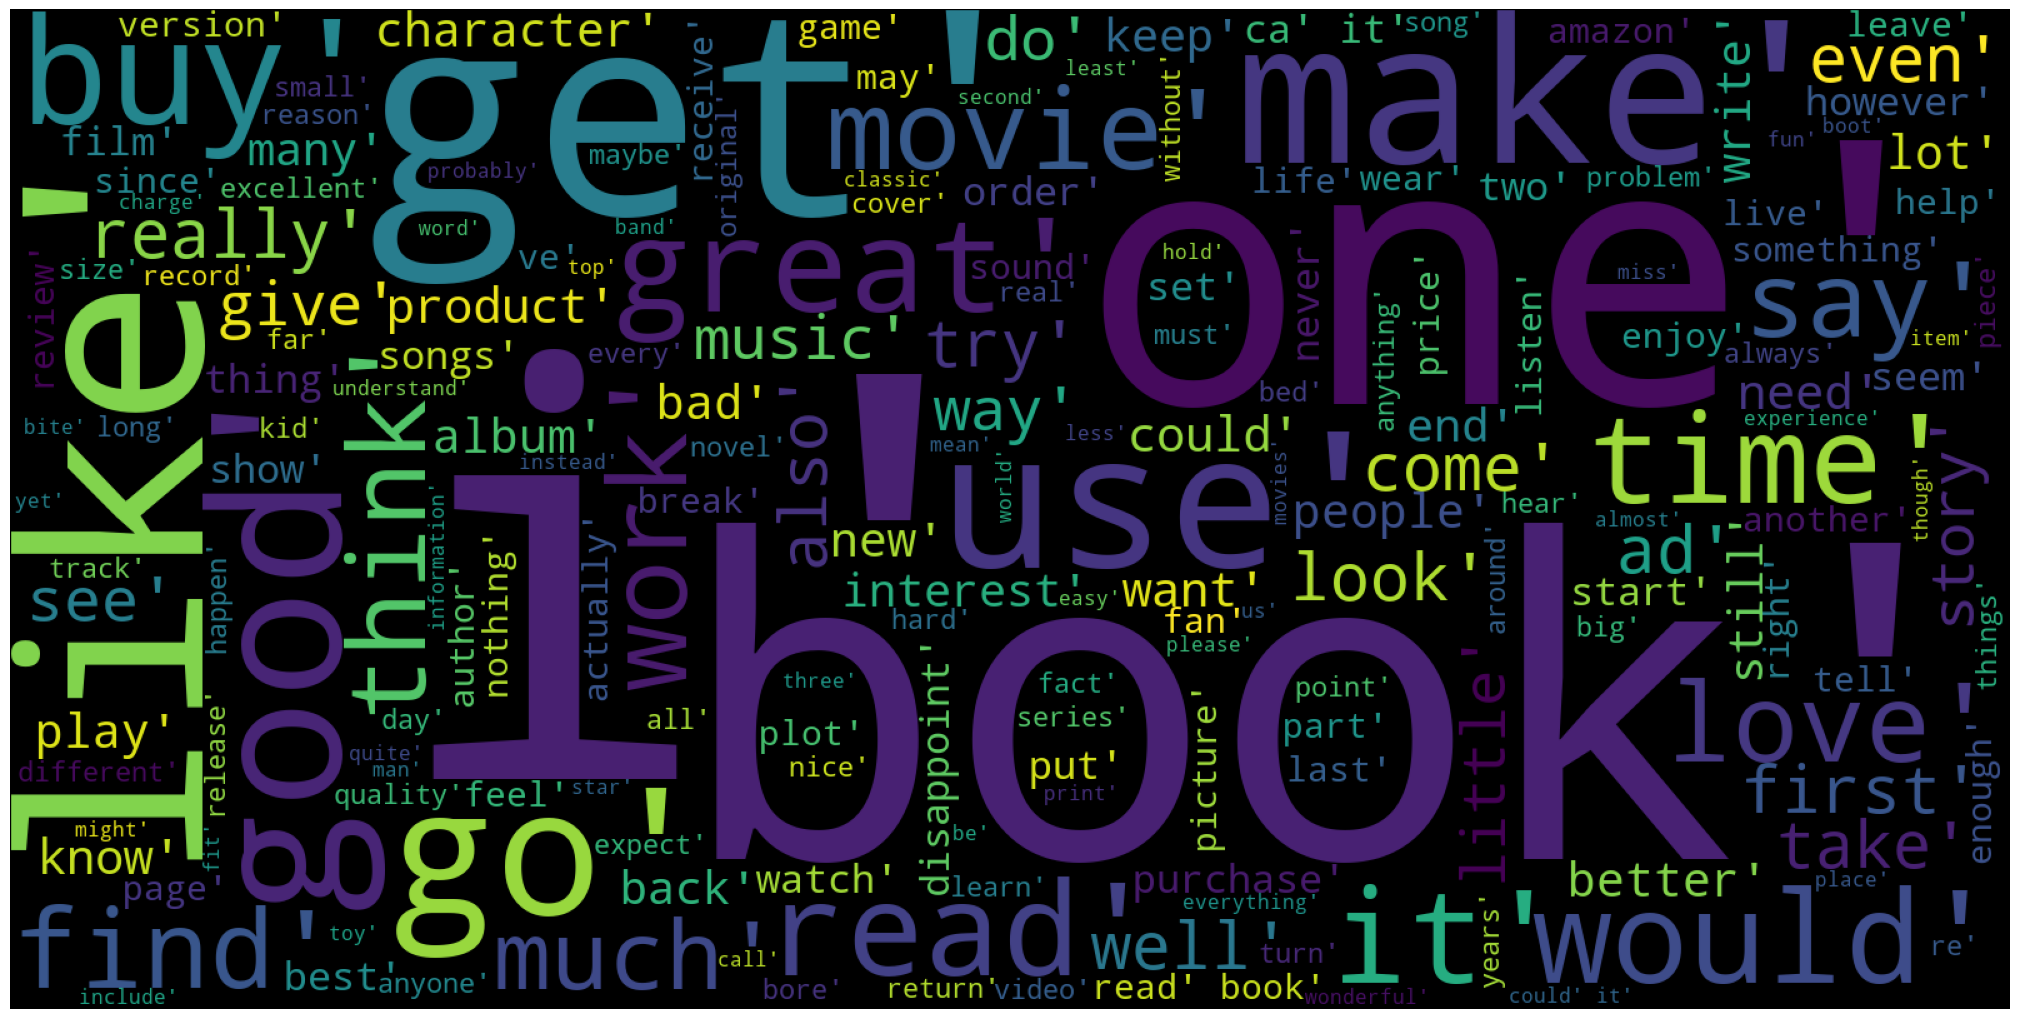

In [72]:
import matplotlib.pyplot as plt
subset_train_data['tokenized_text']=subset_train_data['tokenized_text'].astype(str)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(background_color='black',  width=1600, height=800, random_state = 42).generate(' '.join(subset_train_data['tokenized_text']))
# plot the word cloud  #Word clouds are often created as a visual representation of textual data
plt.figure(figsize=(20,10), frameon=False)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_4696\1537365770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_test_data['tokenized_text']=subset_test_data['tokenized_text'].astype(str)


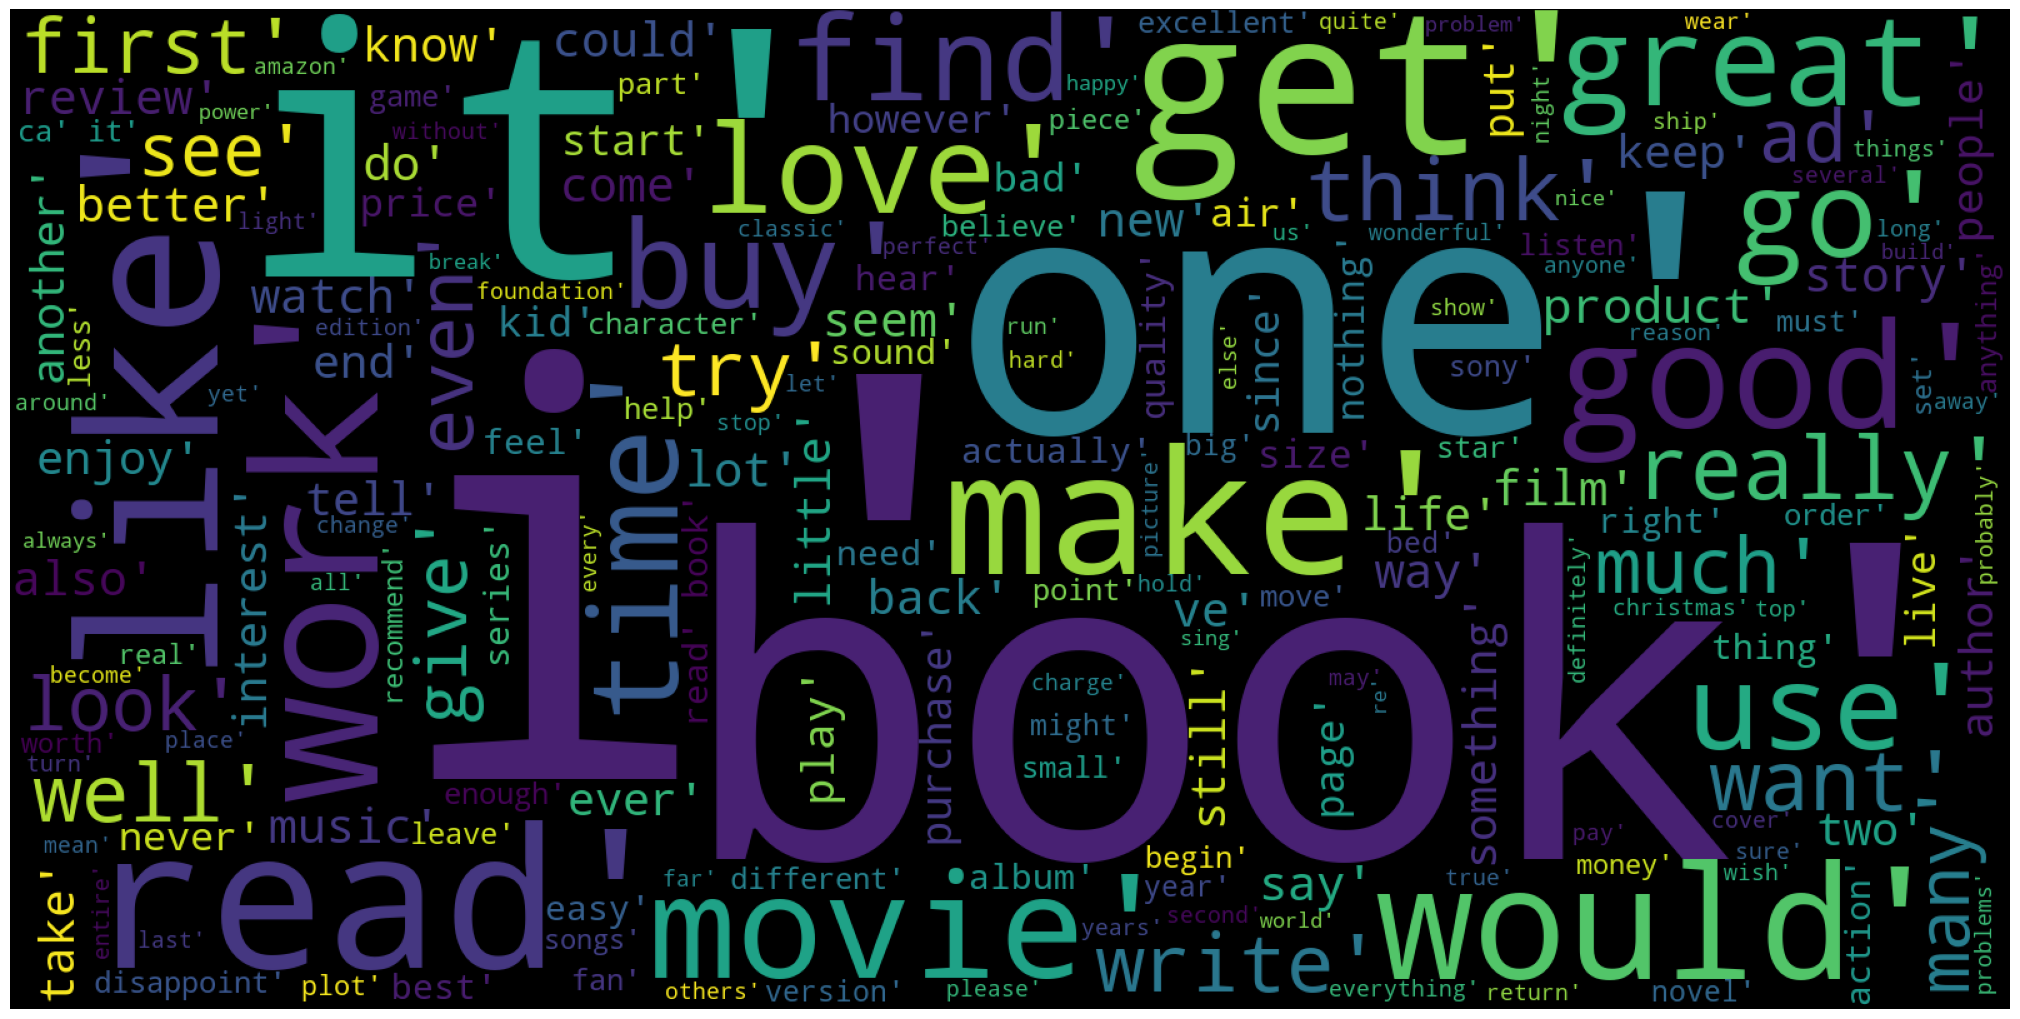

In [88]:
import matplotlib.pyplot as plt
subset_test_data['tokenized_text']=subset_test_data['tokenized_text'].astype(str)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(background_color='black',  width=1600, height=800, random_state = 42).generate(' '.join(subset_test_data['tokenized_text']))
# plot the word cloud  #Word clouds are often created as a visual representation of textual data
plt.figure(figsize=(20,10), frameon=False)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# TF-IDF Vectorization :
### TF:
It is calculated by counting the number of times a term appears in a document
and dividing that by the total number of terms in the document. 
### IDF:
the rarity of a term across the corpus (collection of documents). It is calculated by taking the logarithm of the total number of documents in 
the corpus divided by the number of documents that contain the term. 
### TF-IDF = TF * IDF

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

combined_text = pd.concat([subset_train_data['tokenized_text'], subset_test_data['tokenized_text']])

tfidf_vectorizer = TfidfVectorizer(max_features=3000) 

tfidf_train = tfidf_vectorizer.fit_transform(combined_text)

# Split the TF-IDF matrix back into train and test based on the lengths of the original subsets
tfidf_train_data = tfidf_train[:len(subset_train_data)]
tfidf_test_data = tfidf_train[len(subset_train_data):]

# Model Building

In [105]:
from sklearn.ensemble import RandomForestClassifier
y_train=subset_train_data["polarity"]
# Train Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(tfidf_train_data, y_train)

# Predict using the test data
rf_predictions = random_forest_model.predict(tfidf_test_data)

In [108]:
y_train

0       2
1       2
2       2
3       2
4       2
       ..
4995    2
4996    2
4997    2
4998    2
4999    2
Name: polarity, Length: 5000, dtype: int64

In [107]:
rf_predictions.shape

(499,)

In [101]:
rf_predictions

array([2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,